<a href="https://colab.research.google.com/github/svf5398/ParentPaper/blob/main/Adult2017_Feature_Engineering_%26_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Adult 2017 Dataset: Feature Engineering**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import  LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from numpy import set_printoptions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

data = pd.read_csv('Adult-Data2017.csv', na_values='?')
for column in data.columns:
    if data[column].dtype == type(object):
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column].astype(str))
data.drop(['age_desc'] ,  axis = 1, inplace = True)
data.drop(['id'] ,  axis = 1, inplace = True)
data.replace("?",np.nan,inplace=True) #replace ? with nan

In [ ]:
total_missing_data = data.isnull().sum().sort_values(ascending=False)
percent_of_missing_data = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat(
    [
        total_missing_data, 
        percent_of_missing_data
    ], 
    axis=1, 
    keys=['Total', 'Percent']
)
missing_data.head(10)

,Total,Percent
age,2,0.284091
A2_Score,0,0.000000
relation,0,0.000000
result,0,0.000000
used_app_before,0,0.000000
contry_of_res,0,0.000000
austim,0,0.000000
jundice,0,0.000000
ethnicity,0,0.000000
gender,0,0.000000


# Missing Data mean value or dropna():

In [ ]:
data.loc[(data['age'].isnull())]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
62,0,0,0,0,0,0,0,0,0,0,NaN,1,10,0,0,52,0,0,5,0
91,0,1,0,0,1,0,1,0,0,1,NaN,0,10,0,0,36,0,4,5,0


In [ ]:
data.age[62]=data.age.median()
data.age[91]=data.age.median()
data.loc[(data['age'].isnull())]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD


# ANOVA

In [ ]:
X_Feature = data.iloc[:,0:19]  #independent columns
Y_Feature = data.iloc[:,19]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeaturesANOVA = SelectKBest(score_func=f_classif, k=10)
fitANOVA = bestfeaturesANOVA.fit(X_Feature,Y_Feature)
# summarize scores
set_printoptions(precision=3)
dfscores = pd.DataFrame(fitANOVA.scores_)
dfcolumns = pd.DataFrame(X_Feature.columns)
#concat two dataframes for better visualization 
ANOVAfeatureScores = pd.concat([dfcolumns,dfscores],axis=1)
ANOVAfeatureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(ANOVAfeatureScores )

            Feature        Score
0          A1_Score    68.228532
1          A2_Score    75.372977
2          A3_Score   169.558180
3          A4_Score   198.980081
4          A5_Score   284.472758
5          A6_Score   378.950728
6          A7_Score    98.914620
7          A8_Score    41.837241
8          A9_Score   475.766584
9         A10_Score   122.845954
10              age     2.489784
11           gender     4.564842
12        ethnicity    11.108392
13          jundice     7.402575
14           austim    22.814258
15    contry_of_res     0.200117
16  used_app_before     1.364057
17           result  1456.489621
18         relation     2.282219


In [ ]:
print('Univariate Selection using ANOVA')
print(ANOVAfeatureScores.nlargest(15,'Score'))  #print 15 best features

Univariate Selection using ANOVA
      Feature        Score
17     result  1456.489621
8    A9_Score   475.766584
5    A6_Score   378.950728
4    A5_Score   284.472758
3    A4_Score   198.980081
2    A3_Score   169.558180
9   A10_Score   122.845954
6    A7_Score    98.914620
1    A2_Score    75.372977
0    A1_Score    68.228532
7    A8_Score    41.837241
14     austim    22.814258
12  ethnicity    11.108392
13    jundice     7.402575
11     gender     4.564842


# Chi

In [ ]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fitChi = bestfeatures.fit(X_Feature,Y_Feature)
dfscores = pd.DataFrame(fitChi.scores_)
dfcolumns = pd.DataFrame(X_Feature.columns)
#concat two dataframes for better visualization 
ChifeatureScores = pd.concat([dfcolumns,dfscores],axis=1)
ChifeatureScores.columns = ['Feature','Score']  #naming the dataframe columns
ChifeatureScores

,Feature,Score
0,A1_Score,17.362110
1,A2_Score,37.329052
2,A3_Score,74.316582
3,A4_Score,78.401210
4,A5_Score,101.795901
5,A6_Score,176.688134
6,A7_Score,50.635852
7,A8_Score,13.892553
8,A9_Score,192.283341
9,A10_Score,44.679599


In [ ]:
print('Univariate Selection using chi')
print(ChifeatureScores.nlargest(15,'Score'))  #print 15 best features

Univariate Selection using chi
      Feature       Score
17     result  608.887098
8    A9_Score  192.283341
5    A6_Score  176.688134
4    A5_Score  101.795901
3    A4_Score   78.401210
2    A3_Score   74.316582
6    A7_Score   50.635852
9   A10_Score   44.679599
1    A2_Score   37.329052
12  ethnicity   26.791699
10        age   22.739639
14     austim   19.294792
0    A1_Score   17.362110
7    A8_Score   13.892553
13    jundice    6.626188


# Correlation

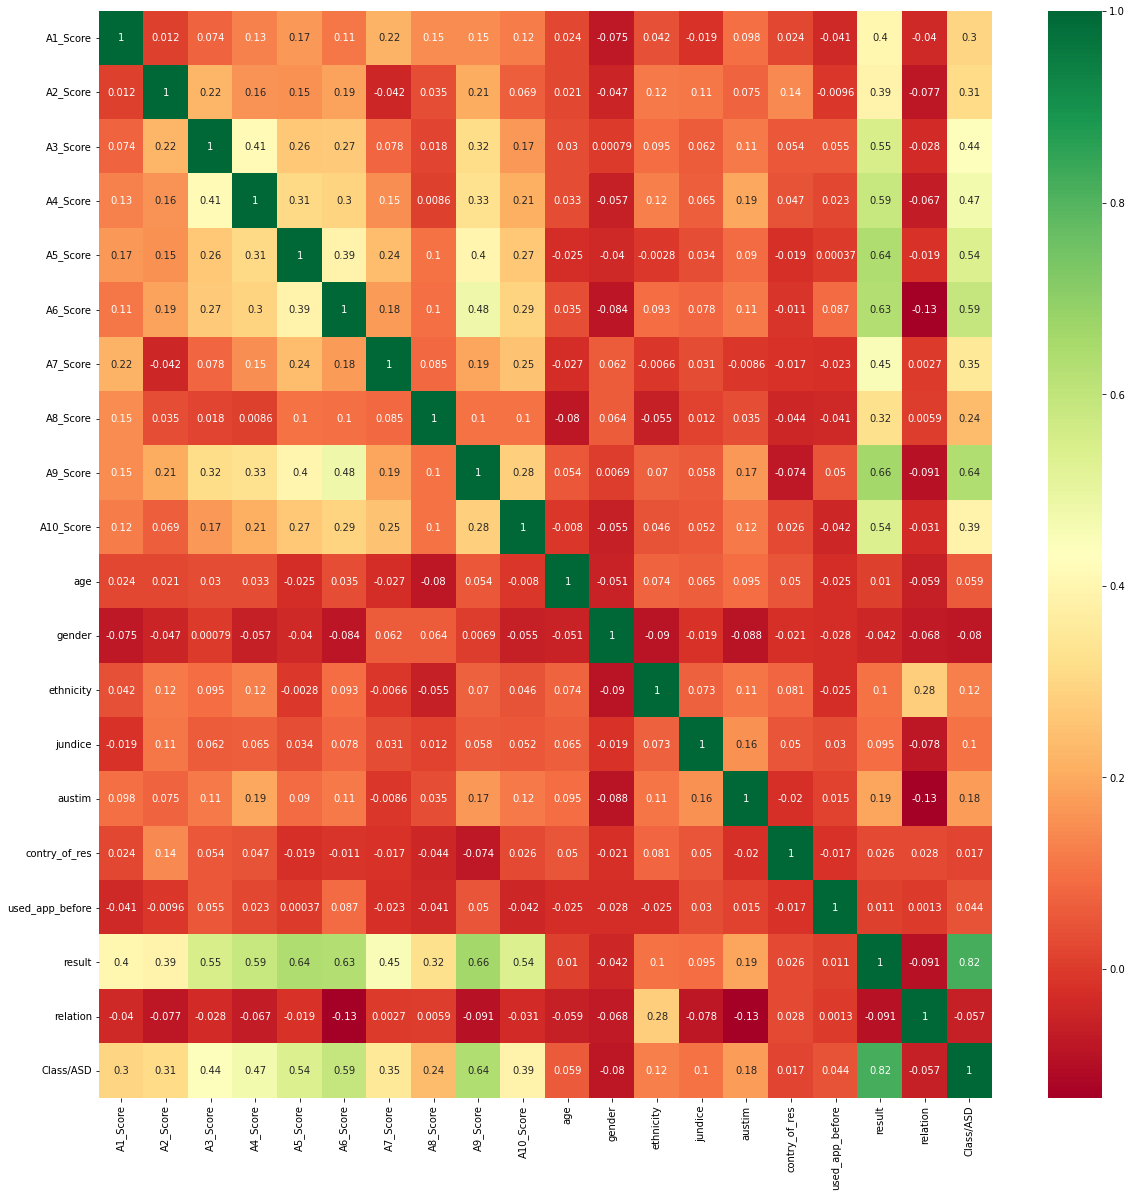

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# **Adult 2017 Dataset: Model**

In [ ]:
import time
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import  LabelEncoder
import pandas as pd
import numpy as np

data = pd.read_csv('Adult-Data2017.csv', na_values='?')
data.rename(columns={'Class/ASD': 'class'}, inplace=True)

for column in data.columns:
    if data[column].dtype == type(object):
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column].astype(str))

names = []
models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))

X=data[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']]
Y=data['class']

start_time = 0
elapsed_time = 0
confusion=0
pred=0

# Cross Validation

In [ ]:
seed = 7
kfold = KFold(n_splits=10) # removed parameter "random state=seed" because it gave an error. Removing parameter did not affect output
for name, m in models:
    start_time = time.time()
    pred = cross_val_predict(m, X,Y, cv=kfold )
    elapsed_time = time.time() - start_time   
    confusion = metrics.confusion_matrix(Y,pred)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    specificity = TN / (TN + FP)
    sensitivity = TP / float(FN + TP)
    error = (FP + FN) / float(TP + TN + FP + FN) # equal #error_rate = 1 - accuracy
    F1Score = f1_score(Y, pred, average='binary')
    AUC=metrics.roc_auc_score(Y, pred)
    print(name)
    print('%.4f' % elapsed_time)
    print('%.4f' % float(accuracy *100.0))
    print('%.4f' %float(specificity*100.0))
    print('%.4f' %float(sensitivity*100.0))
    print('%.4f' %float(AUC*100.0))
    print('%.4f' %float(F1Score*100.0))
    print('%.4f' %float(error*100.0))
    print(' =======================')      

LR
0.1944
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
LDA
0.1148
96.1648
97.0874
93.6508
95.3691
92.9134
3.8352
CART
0.1082
94.1761
94.9515
92.0635
93.5075
89.4602
5.8239
NB
0.0800
96.5909
98.4466
91.5344
94.9905
93.5135
3.4091
KNN
0.2742
95.0284
95.7282
93.1217
94.4249
90.9561
4.9716
SVM
0.3816
98.5795
99.6117
95.7672
97.6894
97.3118
1.4205
AB
1.9868
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
GBM
1.8894
97.4432
98.6408
94.1799
96.4103
95.1872
2.5568
RF
1.7005
96.4489
98.2524
91.5344
94.8934
93.2615
3.5511
ET
1.3309
95.0284
96.6990
90.4762
93.5876
90.7162
4.9716


# Leave

In [ ]:
num_folds = 10
for name, m in models: 
    loocv = LeaveOneOut() 
    start_time=time.time()
    pred = cross_val_predict(m, X,Y, cv=loocv )
    elapsed_time = time.time() - start_time
    confusion = metrics.confusion_matrix(Y,pred)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    specificity = TN / (TN + FP)
    sensitivity = TP / float(FN + TP)
    F1Score = f1_score(Y, pred, average='binary')
    AUC=metrics.roc_auc_score(Y, pred)
    error = (FP + FN) / float(TP + TN + FP + FN)
    print(name)
    print('%.4f' % elapsed_time)
    print('%.4f' % float(accuracy *100.0))
    print('%.4f' %float(specificity*100.0))
    print('%.4f' %float(sensitivity*100.0))
    print('%.4f' %float(AUC*100.0))
    print('%.4f' %float(F1Score*100.0))
    print('%.4f' %float(error*100.0))
    print(' =======================') 

LR
10.6671
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
LDA
3.7553
96.1648
97.2816
93.1217
95.2016
92.8760
3.8352
CART
2.9390
94.3182
95.1456
92.0635
93.6046
89.6907
5.6818
NB
2.9882
97.0170
98.4466
93.1217
95.7841
94.3700
2.9830
KNN
3.6961
95.5966
95.9223
94.7090
95.3157
92.0308
4.4034
SVM
7.0043
99.2898
99.6117
98.4127
99.0122
98.6737
0.7102
AB
67.5133
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
GBM
73.4498
97.8693
99.0291
94.7090
96.8691
95.9786
2.1307
RF
132.1866
96.3068
97.6699
92.5926
95.1312
93.0851
3.6932
ET
93.1363
95.4545
96.5049
92.5926
94.5487
91.6230
4.5455


# Train Test Split

In [ ]:
test_size = 0.3
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
for name, m in models:
    model = m
    start_time = time.time()
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    elapsed_time = time.time() - start_time
    confusion = metrics.confusion_matrix(Y_test,pred)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    specificity = TN / (TN + FP)
    sensitivity = TP / float(FN + TP)
    F1Score = f1_score(Y_test, pred, average='binary')
    AUC=metrics.roc_auc_score(Y_test, pred)
    class_error = (FP + FN) / float(TP + TN + FP + FN)
    print(name)
    print('%.4f' % elapsed_time)
    print('%.4f' % float(accuracy *100.0))
    print('%.4f' %float(specificity*100.0))
    print('%.4f' %float(sensitivity*100.0))
    print('%.4f' %float(AUC*100.0))
    print('%.4f' %float(F1Score*100.0))
    print('%.4f' %float(class_error*100.0))
    print(' ===========================')

LR
0.0090
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
LDA
0.0064
98.5849
98.0519
100.0000
99.0260
97.4790
1.4151
CART
0.0056
93.3962
94.1558
91.3793
92.7676
88.3333
6.6038
NB
0.0077
97.6415
98.7013
94.8276
96.7644
95.6522
2.3585
KNN
0.0125
96.2264
98.7013
89.6552
94.1782
92.8571
3.7736
SVM
0.0115
98.5849
100.0000
94.8276
97.4138
97.3451
1.4151
AB
0.1050
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
GBM
0.0886
98.5849
100.0000
94.8276
97.4138
97.3451
1.4151
RF
0.1824
97.6415
98.7013
94.8276
96.7644
95.6522
2.3585
ET
0.1504
96.6981
98.0519
93.1034
95.5777
93.9130
3.3019
